In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_pickle("./data/pre-processed-metrics-dataframe.pkl")

# Using a Decision Tree
To determine which of the independent variables impact the dependent variables (primary metrics) the most on each algorithm.

In [3]:
df.columns

Index(['dag', 'system', 'scheduler', 'completed', 'makespan', 'exec_time',
       'run_stats.scheduling_time', 'run_stats.total_task_time',
       'run_stats.total_network_traffic', 'run_stats.total_network_time',
       'run_stats.max_used_cores', 'run_stats.max_used_memory',
       'run_stats.max_cpu_utilization', 'run_stats.max_memory_utilization',
       'run_stats.cpu_utilization', 'run_stats.memory_utilization',
       'run_stats.used_resource_count', 'run_stats.cpu_utilization_used',
       'run_stats.memory_utilization_used', 'run_stats.cpu_utilization_active',
       'run_stats.memory_utilization_active', 'run_stats.expected_makespan',
       'dag_path', 'system_path', 'dag_nodes', 'dag_edges', 'dag_density',
       'speedup', 'processor_count', 'core_count', 'efficiency_processors',
       'efficiency_cores', 'network_bandwidth', 'network_latency',
       'network_model', 'SLR', 'workflow', 'CCR', 'test_id', 'system_type'],
      dtype='object')

In [4]:
independent_vars = [
    # "dag", "system",
    "dag_nodes", "dag_edges",
    "dag_density", "processor_count", "core_count",
    "network_bandwidth", "network_latency",
    # "network_model",
    # "system_type", 
    # "workflow"
]

**NOTE**: You should apply a different transformation method for the following attributes since they are more categorical:
- network_bandwidth (maybe?)
- network_latency (maybe?)
- dag
- system
- network_model
- system_type
- workflow

In [58]:
# Create the transformation pipeline to unskew data and normalize it
pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler())
])

In [60]:
preprocessor = ColumnTransformer(
    transformers=[('transform', pipeline, independent_vars)],
    remainder='passthrough'
)

In [61]:
transformed = preprocessor.fit_transform(df)

In [63]:
new_columns = independent_vars + [col for col in df.columns if col not in independent_vars]
df_transformed = pd.DataFrame(transformed, columns=new_columns)

In [64]:
df_transformed

,dag_nodes,dag_edges,dag_density,processor_count,core_count,network_bandwidth,network_latency,dag,system,scheduler,...,system_path,speedup,efficiency_processors,efficiency_cores,network_model,SLR,workflow,CCR,test_id,system_type
0,0.388536,0.20225,0.165847,1.0,0.7761,0.0,0.0,150-373-0.1,cluster-het-16-128-ConstantBandwidth-125-10,"DYTAS[navigation=Front,sorting=DFS,multicore=S...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,2.269356,0.141835,0.017729,ConstantBandwidth,3.255511,random,0.000942,cluster-het-16-128-ConstantBandwidth-125-10_15...,heterogeneous
1,0.388536,0.20225,0.165847,1.0,0.7761,0.0,0.496611,150-373-0.1,cluster-het-16-128-ConstantBandwidth-125-100,"DYTAS[navigation=Front,sorting=DFS,multicore=S...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,2.269356,0.141835,0.017729,ConstantBandwidth,3.255511,random,0.000942,cluster-het-16-128-ConstantBandwidth-125-100_1...,heterogeneous
2,0.388536,0.20225,0.165847,1.0,0.7761,0.0,1.0,150-373-0.1,cluster-het-16-128-ConstantBandwidth-125-1000,"DYTAS[navigation=Front,sorting=DFS,multicore=S...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,2.269356,0.141835,0.017729,ConstantBandwidth,3.255511,random,0.000942,cluster-het-16-128-ConstantBandwidth-125-1000_...,heterogeneous
3,0.388536,0.20225,0.165847,1.0,0.7761,0.499719,0.0,150-373-0.1,cluster-het-16-128-ConstantBandwidth-1250-10,"DYTAS[navigation=Front,sorting=DFS,multicore=S...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,2.270888,0.141931,0.017741,ConstantBandwidth,3.253314,random,0.000094,cluster-het-16-128-ConstantBandwidth-1250-10_1...,heterogeneous
4,0.388536,0.20225,0.165847,1.0,0.7761,0.499719,0.496611,150-373-0.1,cluster-het-16-128-ConstantBandwidth-1250-100,"DYTAS[navigation=Front,sorting=DFS,multicore=S...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,2.270888,0.141931,0.017741,ConstantBandwidth,3.253314,random,0.000094,cluster-het-16-128-ConstantBandwidth-1250-100_...,heterogeneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130619,0.308087,0.415649,0.736343,0.492112,0.111892,0.499719,0.496611,srasearch-chameleon-50a-005,cluster-hom-8-8-SharedBandwidth-1250-100,"DynamicList[task=BottomLevel,resource=Speed,co...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,7.942357,0.992795,0.992795,SharedBandwidth,2.574891,srasearch,0.010737,cluster-hom-8-8-SharedBandwidth-1250-100_srase...,homogeneous
2130620,0.308087,0.415649,0.736343,0.492112,0.111892,0.499719,1.0,srasearch-chameleon-50a-005,cluster-hom-8-8-SharedBandwidth-1250-1000,"DynamicList[task=BottomLevel,resource=Speed,co...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,7.942347,0.992793,0.992793,SharedBandwidth,2.574894,srasearch,0.010749,cluster-hom-8-8-SharedBandwidth-1250-1000_sras...,homogeneous
2130621,0.308087,0.415649,0.736343,0.492112,0.111892,1.0,0.0,srasearch-chameleon-50a-005,cluster-hom-8-8-SharedBandwidth-12500-10,"DynamicList[task=BottomLevel,resource=Speed,co...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,7.987963,0.998495,0.998495,SharedBandwidth,2.56019,srasearch,0.0003,cluster-hom-8-8-SharedBandwidth-12500-10_srase...,homogeneous
2130622,0.308087,0.415649,0.736343,0.492112,0.111892,1.0,0.496611,srasearch-chameleon-50a-005,cluster-hom-8-8-SharedBandwidth-12500-100,"DynamicList[task=BottomLevel,resource=Speed,co...",...,/home/hgsm/dslab-fork/dytas-benchmark/dytas-co...,7.987963,0.998495,0.998495,SharedBandwidth,2.56019,srasearch,0.000301,cluster-hom-8-8-SharedBandwidth-12500-100_sras...,homogeneous


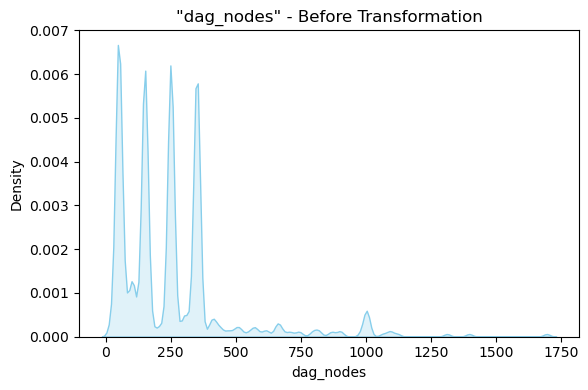

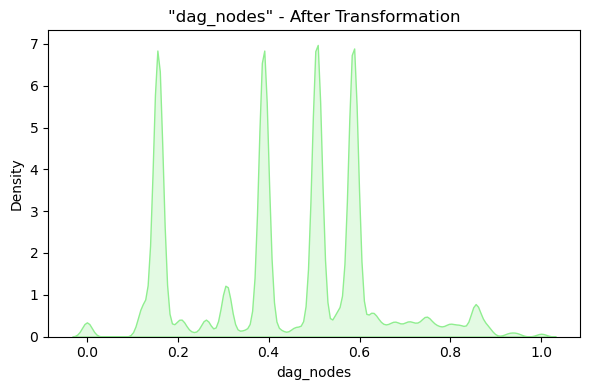

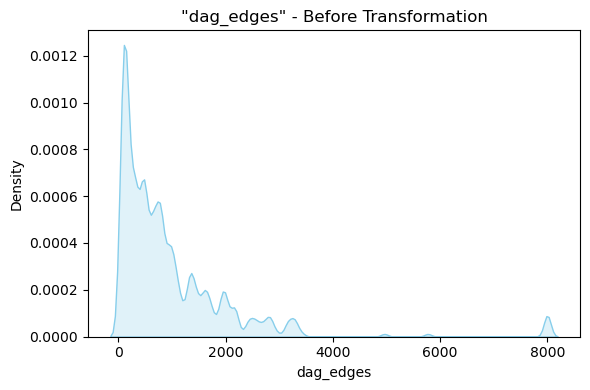

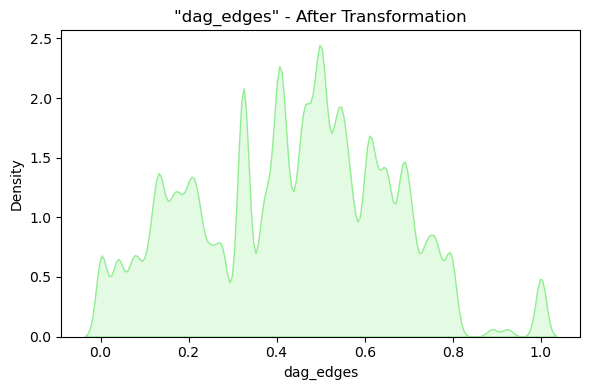

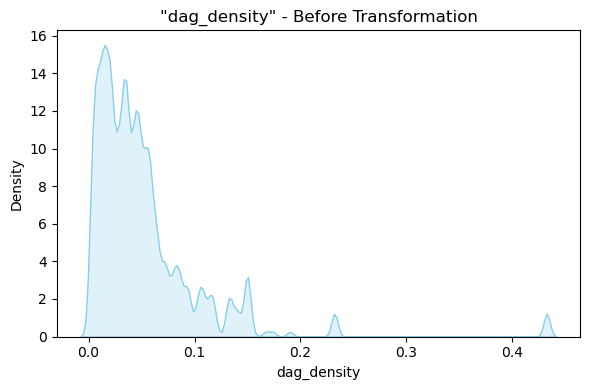

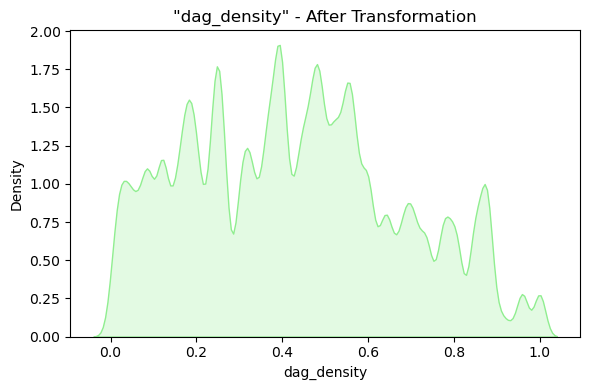

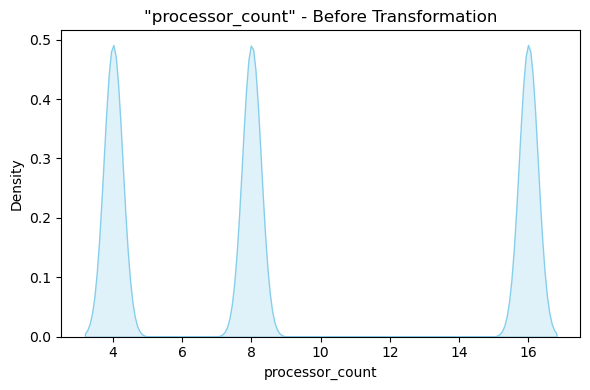

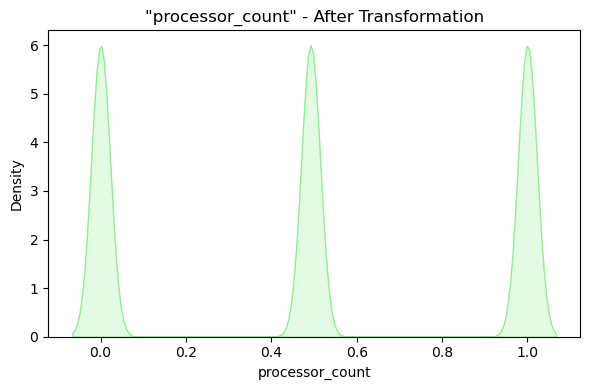

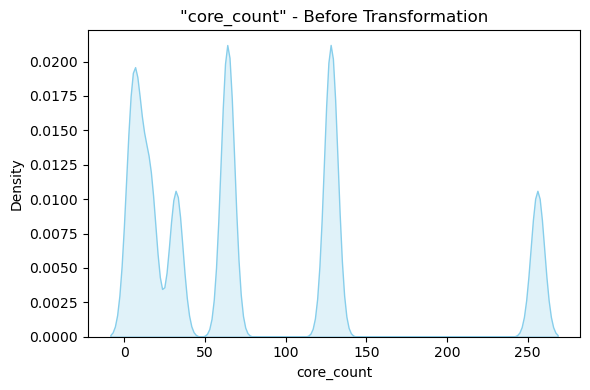

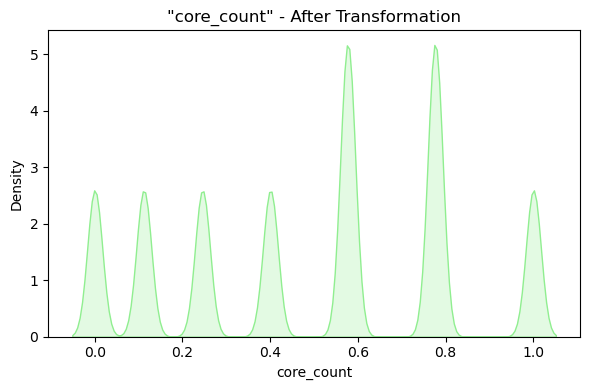

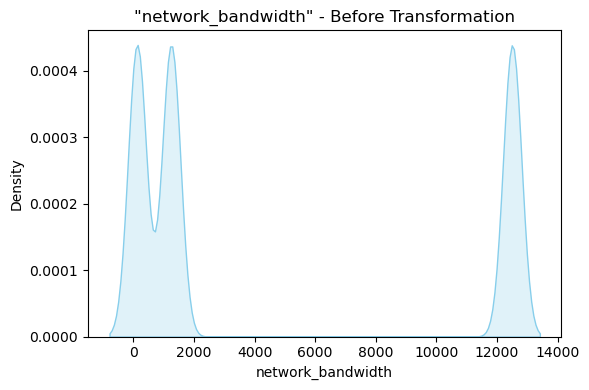

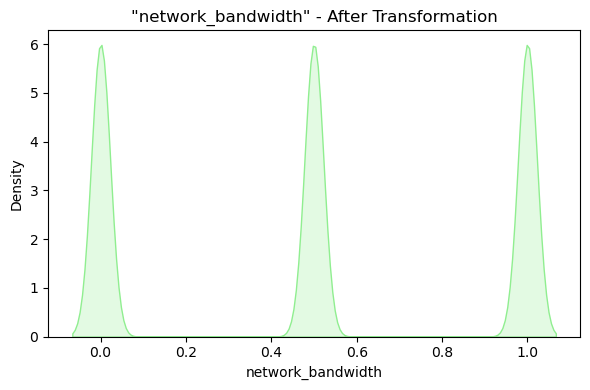

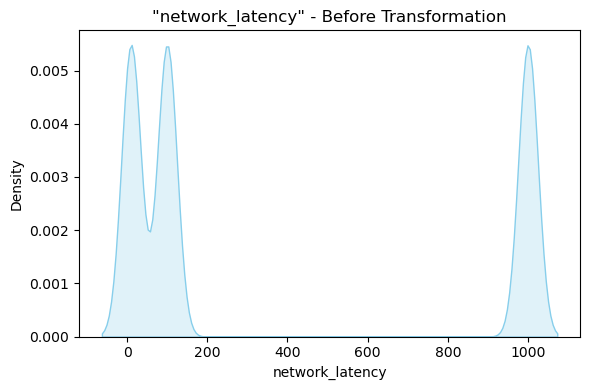

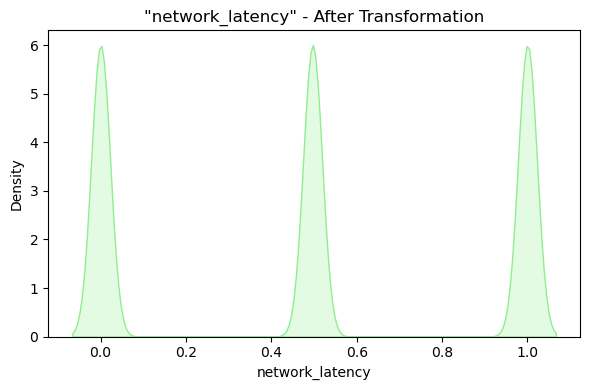

In [66]:
# befor and after
for col in independent_vars:
    # Before
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True, color='skyblue')
    plt.title(f'"{col}" - Before Transformation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    # After
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_transformed[col], fill=True, color='lightgreen')
    plt.title(f'"{col}" - After Transformation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

In [69]:
def decision_tree_regressor(df, dependent_var):
    scheduler_col = "scheduler"
    
    # List to store feature importance data
    feature_importance_data = []
    
    # Iterate through each unique scheduler
    for scheduler in df[scheduler_col].unique():
        # Filter data for the current scheduler
        df_scheduler = df[df[scheduler_col] == scheduler]
        
        # Separate independent and dependent variables
        X = df_scheduler[independent_vars]
        y = df_scheduler[dependent_var]
        
        # Train the Decision Tree Regressor
        model = DecisionTreeRegressor(random_state=0)
        model.fit(X, y)
        
        # Extract feature importances
        importances = model.feature_importances_
        
        # Store the results
        for i, imp in enumerate(importances):
            feature_importance_data.append({'Scheduler': scheduler,
                                            'Feature': independent_vars[i],
                                            'Importance': imp})
    
    # Convert to DataFrame for visualization
    importance_df = pd.DataFrame(feature_importance_data)
    
    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    # Create a barplot with dodging to separate bars by scheduler
    sns.barplot(data=importance_df, x='Feature', y='Importance', hue='Scheduler', dodge=True)
    
    # Add labels and title
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance by Scheduler for ' + dependent_var)
    plt.legend(title='Scheduler')
    
    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [1]:
decision_tree_regressor(df_transformed, "SLR")

NameError: name 'decision_tree_regressor' is not defined

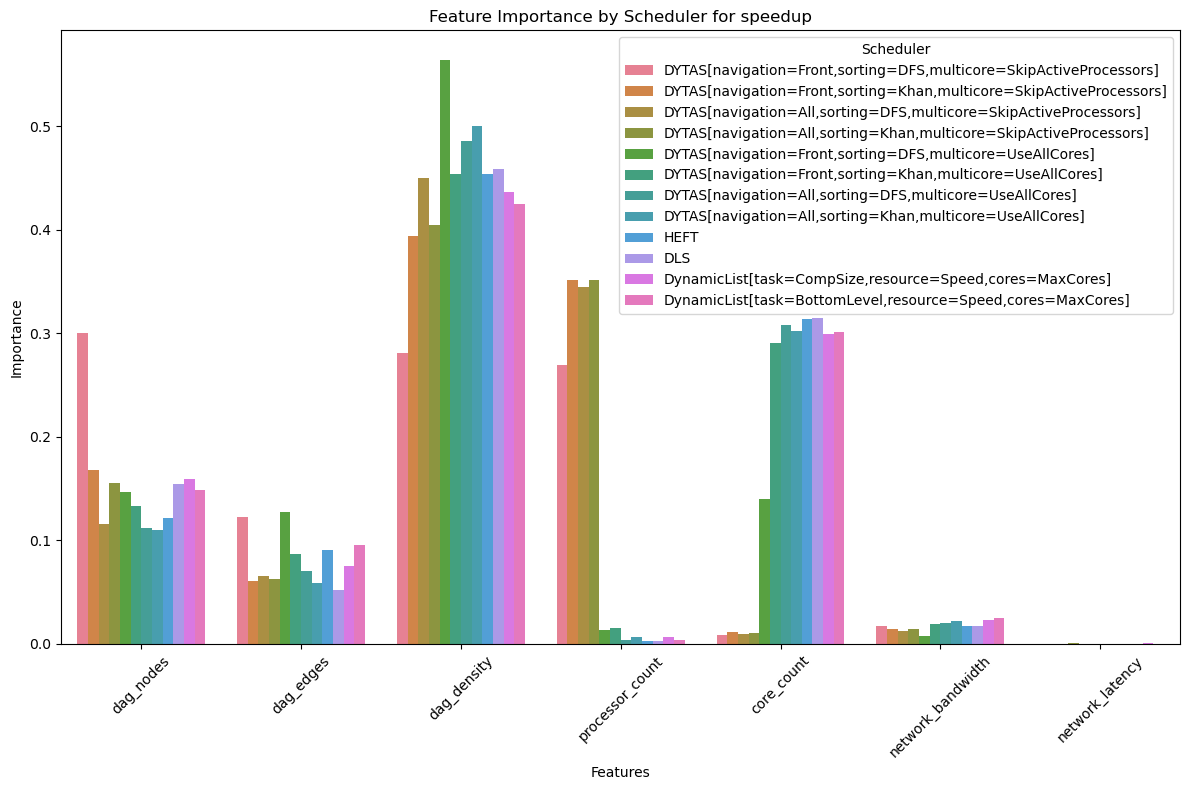

In [71]:
decision_tree_regressor(df_transformed, "speedup")

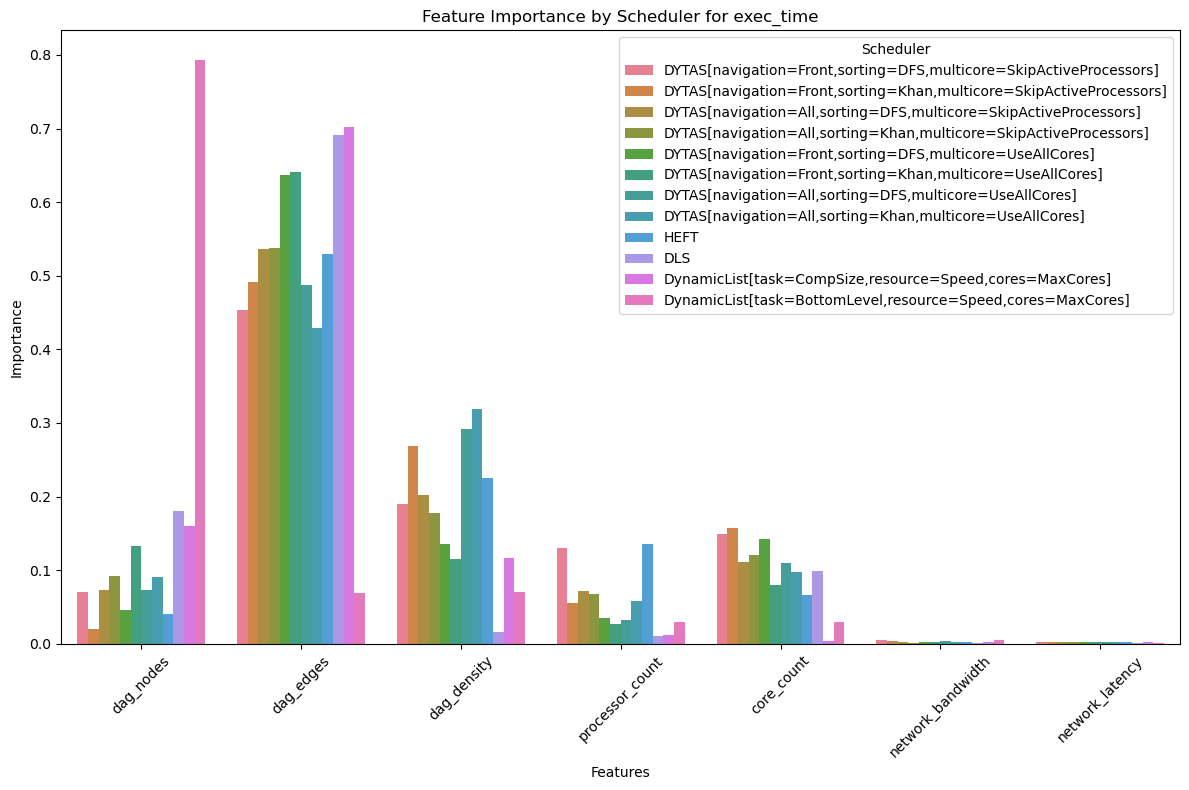

In [72]:
decision_tree_regressor(df_transformed, "exec_time")

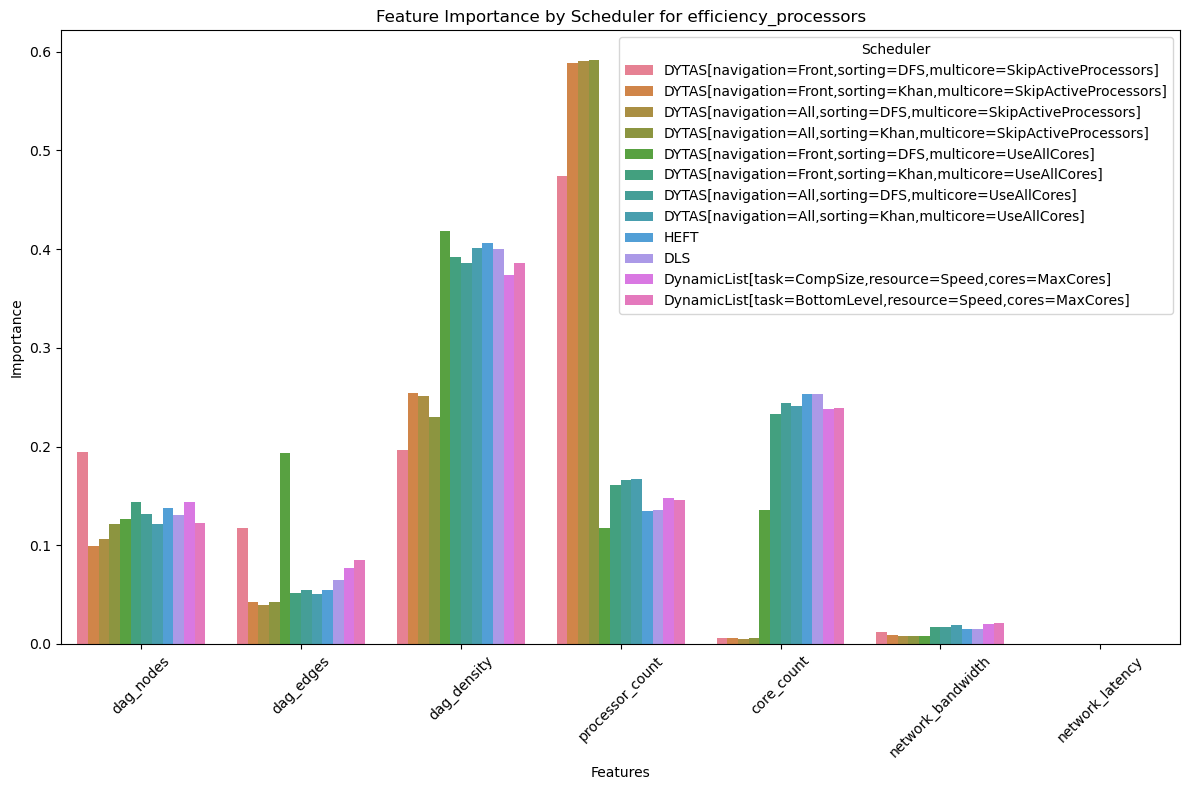

In [73]:
decision_tree_regressor(df_transformed, "efficiency_processors")

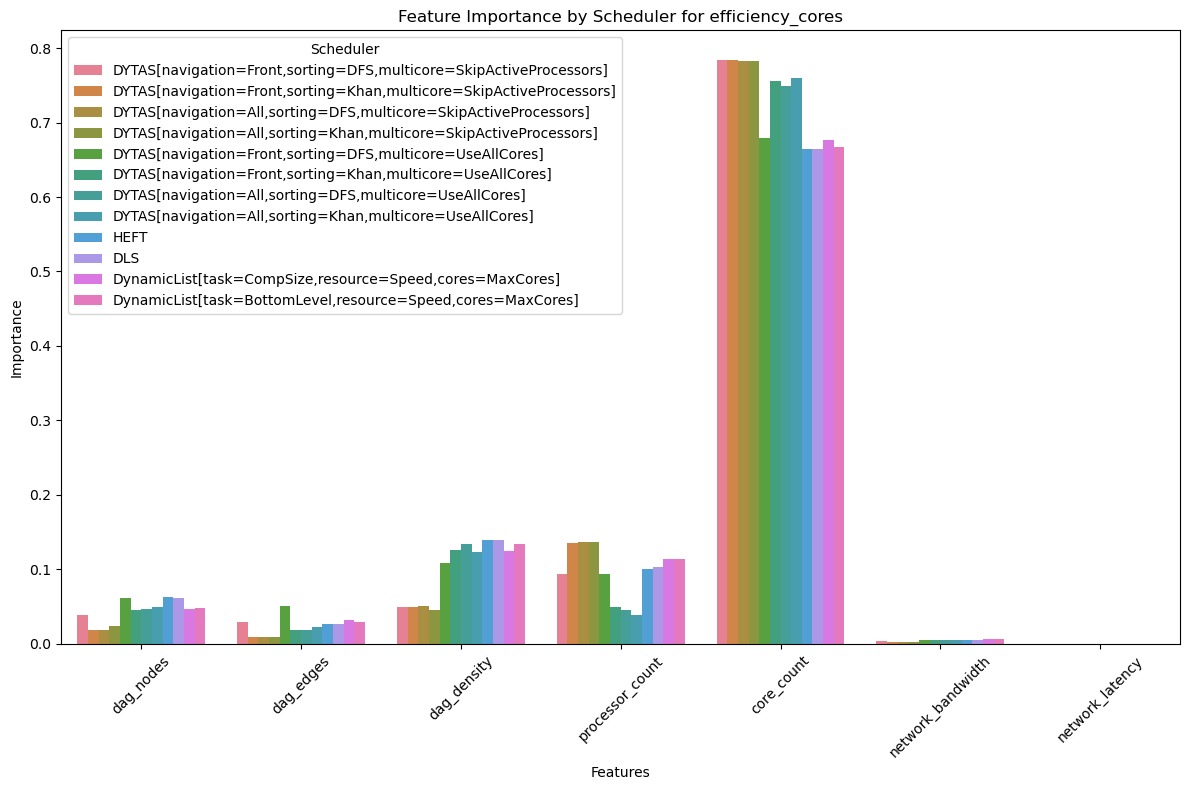

In [74]:
decision_tree_regressor(df_transformed, "efficiency_cores")